In [2]:
%matplotlib Widget

import sampling
import modeling

import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

100%|██████████| 4/4 [00:00<00:00,  6.84it/s]


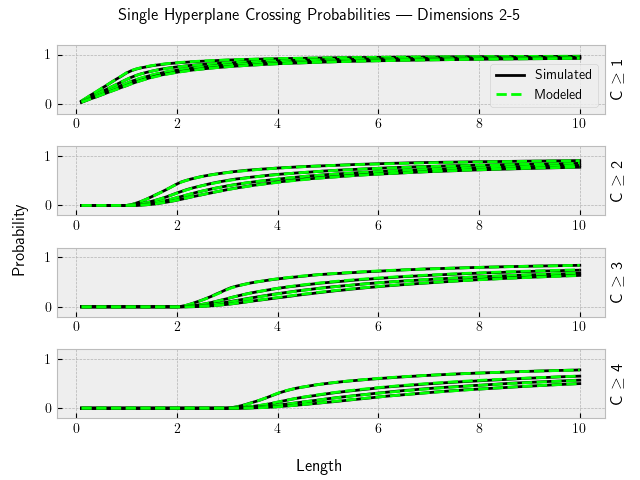

In [7]:
# Probability Given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 10000
dims = np.arange(2, 6, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
Cs = np.arange(4)+1

plt.rc('text', usetex=True)
fig, axs = plt.subplots(len(Cs))
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        spacing = np.ones(dim)
        sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
        ax.plot(lengths, sim_probs, "k")

        probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C $\ge$ ' + f"{c}")
        ax.yaxis.set_label_position("right")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities | Dimensions 2-5")
plt.tight_layout()

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:18<00:00,  2.32s/it]


Text(0, 0.5, 'Probability')

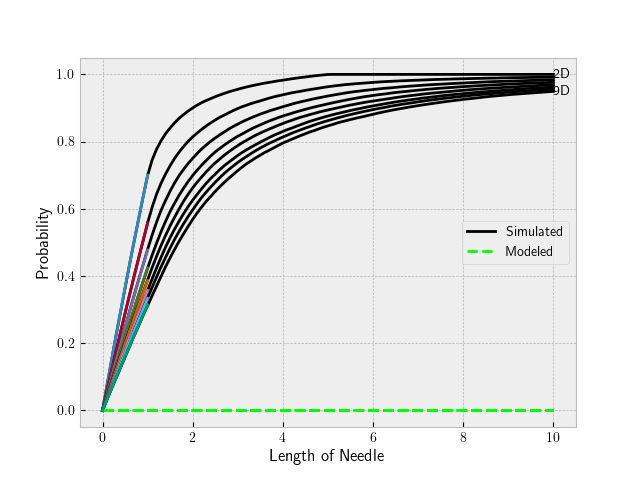

In [11]:
# Probability Given multiple sets of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0, 10, 101)
hyperplanes = 2
c = 1

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):
    spacing = np.ones(dim)
    spacing[1] = 5

    sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
    ax.plot(lengths, sim_probs, "k")

    probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
    ax.plot(lengths, probabilities, "--", color=(0,1,0))

    # Testing new model
    r_ml = lengths[lengths<=min(spacing)]
    modeled_prob_m = r_ml/spacing[0]/np.pi*spec.beta(dim/2, 0.5) + r_ml/spacing[1]/np.pi*spec.beta(dim/2, 0.5) - 2*r_ml**2/np.pi/dim/spacing[0]/spacing[1]
    ax.plot(r_ml, modeled_prob_m)

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
    # ax.plot(lengths[lengths<1], lengths[lengths<1]*spec.gamma(dim/2)/spec.gamma(0.5)/spec.gamma(dim/2+0.5))
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
# ax.set_title("Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions")


[[ 0.14383411  0.68932281  1.04874414  1.62192707]
 [ 0.09979854  0.72496142  0.46584769  1.17462744]
 [ 1.45009513 -0.21301646  0.77427825  1.38710432]
 ...
 [ 0.93334673  0.87736275 -0.46256741  0.27979507]
 [-0.94526703  0.52084985  0.03994336  0.91969951]
 [ 1.00236722  0.14161881 -0.26298942  1.06674141]]
[[ 0.13075829  0.57443568  0.80672626  1.15851933]
 [ 0.09072594  0.60413452  0.35834438  0.8390196 ]
 [ 1.3182683  -0.17751372  0.59559866  0.9907888 ]
 ...
 [ 0.84849703  0.73113562 -0.35582109  0.19985362]
 [-0.85933367  0.43404154  0.03072566  0.65692822]
 [ 0.91124292  0.11801567 -0.20229955  0.76195815]]
0.00693
0.007029164144351328


TypeError: 'int' object is not subscriptable

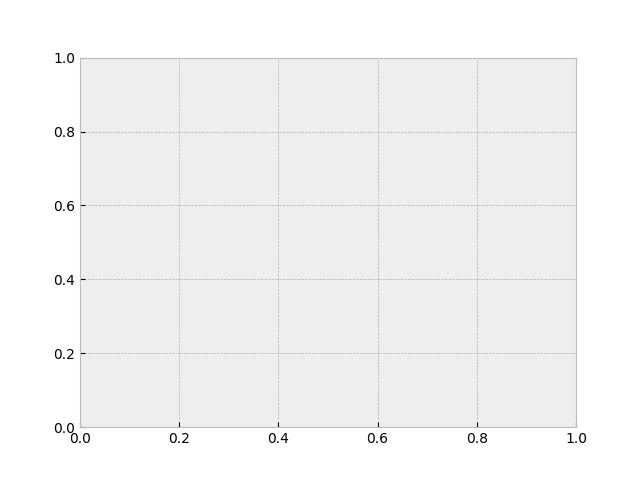

In [108]:
importlib.reload(sampling)
# multi-spacing debug
# np.random.seed(2)
samples = 100000
dim = 4
hyperplanes = 4
spacing = np.array([1.1,1.2, 1.3, 1.4])
# spacing = np.ones(hyperplanes)
length = np.linspace(0, 5, 101)
length = 1

xs = np.random.random((samples, dim))*spacing[None, :]
hypersphere = sampling.get_samples_gaussian(samples, dim)
ys = xs + length * hypersphere
print(ys)
print(ys/spacing[None,:])

intersections = 0
for y in ys:
    if (y[0]>spacing[0] or y[0]<0) and (y[1]>spacing[1] or y[1]<0) and (y[2]>spacing[2] or y[2]<0) and (y[3]>spacing[3] or y[3]<0):
        intersections += 1
probability = intersections / samples
print(probability)


print(length**hyperplanes/np.prod(spacing[:hyperplanes])/np.pi**(hyperplanes/2)*spec.gamma(dim/2)/spec.gamma((dim+hyperplanes)/2))


fig, ax = plt.subplots()
ax.plot(length, sampling.get_sim_prob_e(samples, dim, length, 0, hyperplanes, spacing))
# print((2*length*np.sum(spacing)-length**2)/(np.pi*np.prod(spacing)))
ax.plot(length, 4/np.pi * (length-0.5*length**2))

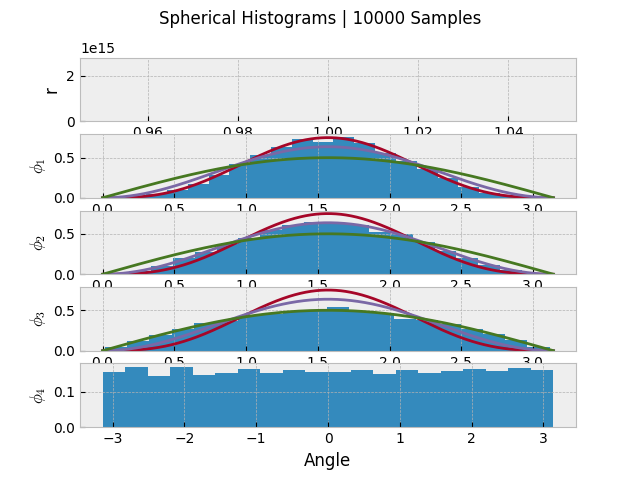

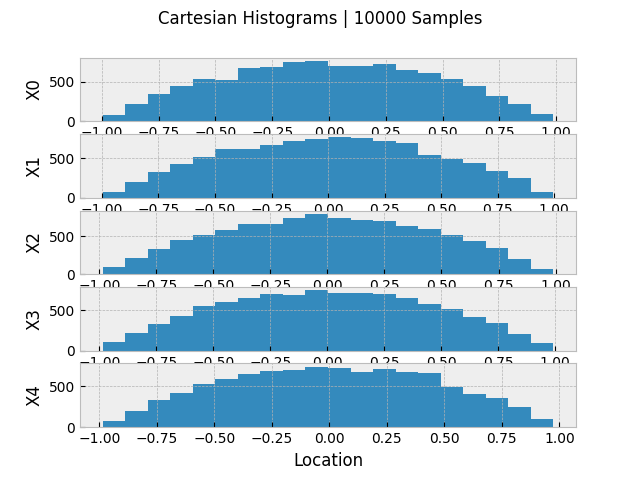

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)